# Assignment 3: In-depth Data analysis and Insights
### ES 114: Probability, Statistics and Data Visualisation


## Introduction

Objective: To analyse the provided datasets to uncover insights that could inform policies aimed at improving air quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Checking versions:
print("Using NumPy version:", np.__version__)
print("Using pandas version:", pd.__version__)
print("Using matplotlib version:", plt.matplotlib.__version__)
print("Using seaborn version:", sns.__version__)
print("Using scipy version:", scipy.__version__)

Using NumPy version: 1.25.2
Using pandas version: 2.1.4
Using matplotlib version: 3.6.3
Using seaborn version: 0.13.2
Using scipy version: 1.9.3


### Loading the datasets

In [3]:
data = pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [4]:
state_data = pd.read_csv('State_data.csv')
state_data

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [5]:
ncap_funding = pd.read_csv('NCAP_Funding.csv')

# Fixing the dataframe
ncap_funding.replace('-', np.nan, inplace=True)
ncap_funding["Amount released during FY 2019-20"] = pd.to_numeric(ncap_funding["Amount released during FY 2019-20"], errors = 'coerce')
ncap_funding["Amount released during FY 2020-21"] = pd.to_numeric(ncap_funding["Amount released during FY 2020-21"], errors = 'coerce')
ncap_funding["Amount released during FY 2021-22"] = pd.to_numeric(ncap_funding["Amount released during FY 2021-22"], errors = 'coerce')
ncap_funding["Utilisation as on June 2022"] = pd.to_numeric(ncap_funding["Utilisation as on June 2022"])
ncap_funding

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6.00,NaN,NaN,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,NaN,NaN,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6.00,NaN,NaN,6.00,19.00
113,114,West Bengal,Howrah,NaN,5.00,NaN,5.00,19.00
114,115,West Bengal,Haldia,NaN,3.00,NaN,3.00,19.00
115,116,West Bengal,Durgapur,NaN,3.00,NaN,3.00,19.00


## Spatial Aggregation

### 1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [6]:
state_avg_pm25 = data.groupby("state")["PM2.5"].mean()

highest_pm25_state = state_avg_pm25.idxmax()
highest_pm25_value = state_avg_pm25.max()

print(f"State with highest average PM2.5: {highest_pm25_state} ({highest_pm25_value:.2f} µg/m³)")

State with highest average PM2.5: Delhi (104.10 µg/m³)


### 2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [7]:
data_2023 = data[data["Timestamp"].dt.year == 2023]

hazardous_days = data_2023[data_2023["PM2.5"] > 300]
hazardous_days_per_state = hazardous_days.groupby(["state", "Timestamp"]).size().reset_index(name="Count")['state'].value_counts()

print(f"State with most hazardous days: {hazardous_days_per_state.idxmax()} ({hazardous_days_per_state.max()} days)")

State with most hazardous days: Delhi (49 days)


### 3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

Variance is the statistical quantity used to measure the degree of variability in a dataset.

In [8]:
state_var=data_2023.groupby("state")["PM2.5"].std()
# Variance is the square of standard deviation

highest_var_state=state_var.idxmax()
highest_var_value=state_var.max()

print(f"State with highest variability: {highest_var_state} ({highest_var_value:.2f} µg/m³)")

State with highest variability: Delhi (82.80 µg/m³)


### 4. Which state has the lowest average PM2.5 levels during the COVID period (The year 2020-2021, both years inclusive)?

In [9]:
df_covid=data[data["Timestamp"].dt.year.isin([2020, 2021])]
state_avg_covid=df_covid.groupby("state")["PM2.5"].mean()

lowest_avg_state=state_avg_covid.idxmin()
lowest_avg_value=state_avg_covid.min()
print(f"State with lowest average PM2.5: {lowest_avg_state} ({lowest_avg_value:.2f} µg/m³)")

State with lowest average PM2.5: Mizoram (14.32 µg/m³)


## Temporal Aggregation

### 1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [10]:
df_aug2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]
max_pm25_row = df_aug2020.loc[df_aug2020["PM2.5"].idxmax()]

print(max_pm25_row["station"])
print(f"{max_pm25_row['PM2.5']:.2f} µg/m³")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
805.51 µg/m³


### 2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [11]:
data_2018=data[data["Timestamp"].dt.year==2018]
data_2018=data_2018[data_2018["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

def season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return None

data_2018["Season"]=data_2018["Timestamp"].dt.month.apply(season)

data_2018

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Season
205010,2018-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
205571,2018-01-02,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
206132,2018-01-03,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
206693,2018-01-04,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
207254,2018-01-05,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
...,...,...,...,...,...,...,...,...,...,...
406970,2018-12-27,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",51.007292,166.288854,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
407531,2018-12-28,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",54.107917,146.100937,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
408092,2018-12-29,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",66.530312,162.755625,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter
408653,2018-12-30,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",75.308125,162.733125,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,Winter


In [12]:
avg_season25=data_2018.groupby("Season").agg({"PM2.5":"mean"})
avg_season25

,PM2.5
Season,
Monsoon,34.425196
Summer,NaN
Winter,67.492344


In [13]:
max_season=avg_season25.idxmax()
max_seasonval=avg_season25.max()
print(f"Season with highest pollution in Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB: {max_season['PM2.5']} ({max_seasonval['PM2.5']:.3f} µg/m³)")

Season with highest pollution in Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB: Winter (67.492 µg/m³)


### 3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

In [14]:
data_2021=data[data["Timestamp"].dt.year==2021]
data_2021=data_2021[data_2021["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

weekdays=data_2021[data_2021["Timestamp"].dt.dayofweek>=5]
weekdays_avg=weekdays.groupby("Timestamp", as_index=False).agg({"PM2.5":"mean"})
weekdays_avg

,Timestamp,PM2.5
0,2021-01-02,NaN
1,2021-01-03,NaN
2,2021-01-09,NaN
3,2021-01-10,NaN
4,2021-01-16,NaN
...,...,...
99,2021-12-12,77.540976
100,2021-12-18,69.390000
101,2021-12-19,95.501875
102,2021-12-25,104.730842


In [15]:
weekend=data_2021[data_2021["Timestamp"].dt.dayofweek<5]
weekend_avg=weekend.groupby("Timestamp", as_index=False).agg({"PM2.5":"mean"})
weekend_avg

,Timestamp,PM2.5
0,2021-01-01,NaN
1,2021-01-04,NaN
2,2021-01-05,NaN
3,2021-01-06,NaN
4,2021-01-07,NaN
...,...,...
256,2021-12-27,78.437500
257,2021-12-28,61.322022
258,2021-12-29,53.149789
259,2021-12-30,50.670843


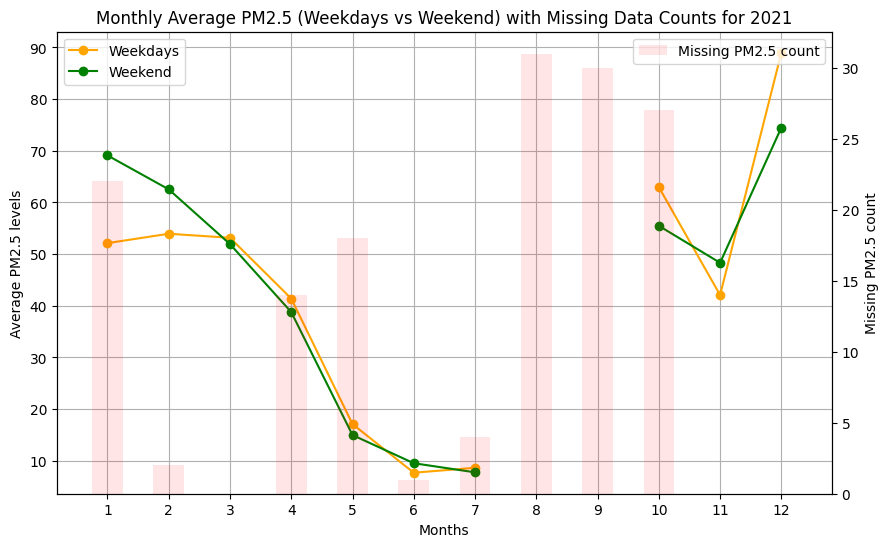

In [16]:
weekdays_monthavg = weekdays_avg.groupby(weekdays_avg["Timestamp"].dt.month).mean()
weekend_monthavg = weekend_avg.groupby(weekend_avg["Timestamp"].dt.month).mean()

missing_counts = data_2021.groupby(data_2021["Timestamp"].dt.month)["PM2.5"].apply(lambda x: x.isna().sum())

fig, ax1 = plt.subplots(figsize=(10, 6))

# Main plot
ax1.plot(weekdays_monthavg.index, weekdays_monthavg["PM2.5"], label="Weekdays", marker="o", color="orange")
ax1.plot(weekend_monthavg.index, weekend_monthavg["PM2.5"], label="Weekend", marker="o", color="green")
ax1.set_xlabel("Months")
ax1.set_ylabel("Average PM2.5 levels")
ax1.set_xticks(range(1, 13))
ax1.grid(True)
ax1.legend(loc="upper left")

# Secondary plot showing missing data counts
ax2 = ax1.twinx()
ax2.bar(missing_counts.index, missing_counts.values, color="red", alpha=0.1, width=0.5, label="Missing PM2.5 count")
ax2.set_ylabel("Missing PM2.5 count")
ax2.legend(loc="upper right")

plt.title("Monthly Average PM2.5 (Weekdays vs Weekend) with Missing Data Counts for 2021")
plt.show()

It is clear from the above graph that data for the months August and September is completely missing from the dataset, and data for October is also missing for the most part.

We shall be applying interpolation to tackle this.

In [17]:
weekdays_avg = weekdays_avg.set_index('Timestamp')
weekdays_avg = weekdays_avg.resample('D').mean()
weekdays_avg['PM2.5'] = weekdays_avg['PM2.5'].interpolate(method='time')

weekend_avg = weekend_avg.set_index('Timestamp')
weekend_avg = weekend_avg.resample('D').mean()
weekend_avg['PM2.5'] = weekend_avg['PM2.5'].interpolate(method='time')

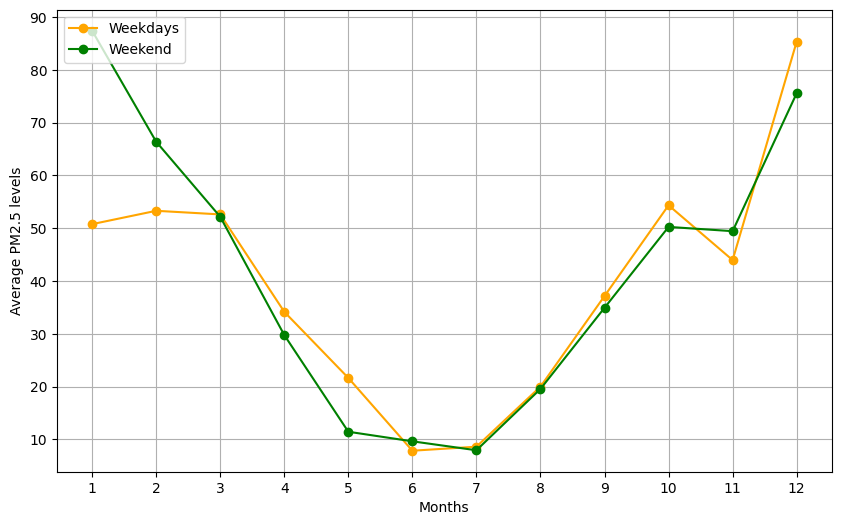

In [18]:
# Plotting the interpolated data

weekdays_monthavg = weekdays_avg.groupby(weekdays_avg.index.month).mean()
weekend_monthavg = weekend_avg.groupby(weekend_avg.index.month).mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekdays_monthavg.index, weekdays_monthavg["PM2.5"], label="Weekdays", marker="o", color="orange")
ax.plot(weekend_monthavg.index, weekend_monthavg["PM2.5"], label="Weekend", marker="o", color="green")
ax.set_xlabel("Months")
ax.set_ylabel("Average PM2.5 levels")
ax.set_xticks(range(1, 13))
ax.grid(True)
ax.legend(loc="upper left")

fig.show()

## Spatio-temporal aggregation

### 1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [19]:
data_2022 = data[data['Timestamp'].dt.year == 2022]

summer_data = data_2022[data_2022['Timestamp'].dt.month.isin([3, 4, 5])]
monsoon_data = data_2022[data_2022['Timestamp'].dt.month.isin([6, 7, 8, 9])]

summer_avg_pm25 = summer_data.groupby('state')['PM2.5'].mean().reset_index()
summer_avg_pm25.rename(columns={'PM2.5': 'Summer_PM2.5'}, inplace=True)

monsoon_avg_pm25 = monsoon_data.groupby('state')['PM2.5'].mean().reset_index()
monsoon_avg_pm25.rename(columns={'PM2.5': 'Monsoon_PM2.5'}, inplace=True)

merged_pm25 = pd.merge(summer_avg_pm25, monsoon_avg_pm25, on='state', how='inner')

merged_pm25['Percentage_Change'] = ((merged_pm25['Monsoon_PM2.5'] - merged_pm25['Summer_PM2.5']) / merged_pm25['Summer_PM2.5']) * 100
merged_pm25['Percentage_Change'] = merged_pm25['Percentage_Change'].fillna(0)  #Replacing NaN with 0 if Summer_PM2.5 is 0

 
most_difference_state = merged_pm25.loc[merged_pm25['Percentage_Change'].abs().idxmax()]

print("Percentage Change in PM2.5 Levels During Monsoon Compared to Summer (2022):")
merged_pm25

Percentage Change in PM2.5 Levels During Monsoon Compared to Summer (2022):


,state,Summer_PM2.5,Monsoon_PM2.5,Percentage_Change
0,Andhra Pradesh,30.128540,19.355510,-35.756894
1,Arunachal Pradesh,32.116292,15.069892,-53.077110
2,Assam,56.337647,21.872292,-61.176419
3,Bihar,75.834868,35.642356,-53.000042
4,Chandigarh,59.695914,32.758585,-45.124242
5,Chhattisgarh,22.321561,19.871696,-10.975330
6,Delhi,95.667628,42.769572,-55.293579
7,Gujarat,65.113078,35.852728,-44.937747
8,Haryana,81.727661,41.922458,-48.704688
9,Himachal Pradesh,61.471943,38.686133,-37.067008


In [20]:
print("\nState with the Most Difference:")
most_difference_state


State with the Most Difference:


state                    Assam
Summer_PM2.5         56.337647
Monsoon_PM2.5        21.872292
Percentage_Change   -61.176419
Name: 2, dtype: object

### 2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


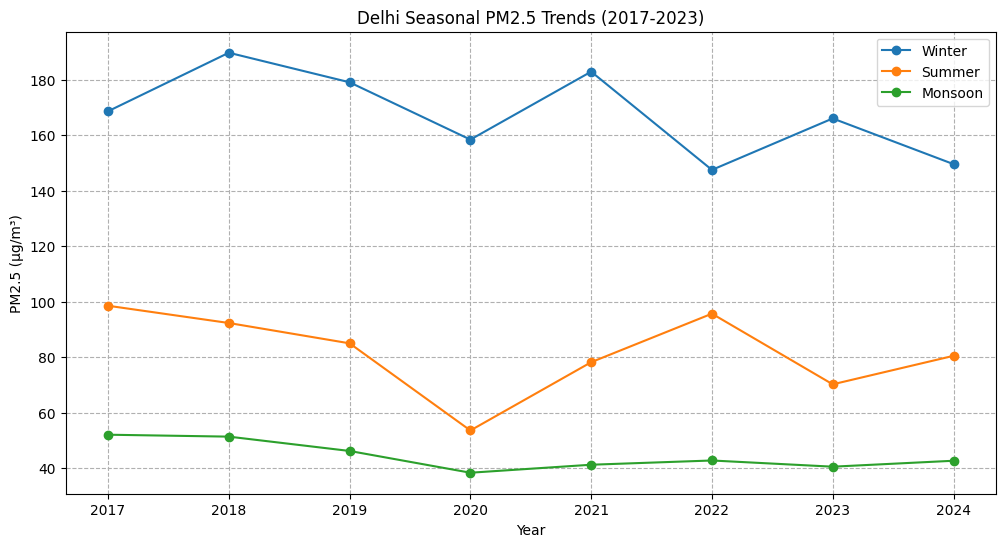

In [21]:
def get_season(month):
    if month in [12, 1, 2]:
      return 'Winter'
    elif month in [3, 4, 5]:
      return 'Summer'
    elif month in [6, 7, 8, 9]:
      return 'Monsoon'
    else:
      return np.nan


data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Season'] = data['Month'].apply(get_season)


delhi_data = data[data['state'] == 'Delhi']
seasonal_avg = delhi_data.groupby(['Year', 'Season'])['PM2.5'].mean()
seasonal_avg = delhi_data.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()


plt.figure(figsize=(12,6))
for season in ['Winter', 'Summer', 'Monsoon']:
    plt.plot(seasonal_avg.index, seasonal_avg[season], marker='o', label=season)

plt.title('Delhi Seasonal PM2.5 Trends (2017-2023)')
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(linestyle='--')
plt.show()


### 3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [22]:
delhi_data = data[data['city'] == 'Delhi']
mumbai_data = data[data['city'] == 'Mumbai']


delhi_pm25 = delhi_data.groupby('Year')['PM2.5'].mean().reset_index()
mumbai_pm25 = mumbai_data.groupby('Year')['PM2.5'].mean().reset_index()

years = pd.DataFrame({'Year': range(2015, 2024)})

delhi_pm25 = pd.merge(years, delhi_pm25, on='Year', how='left')
mumbai_pm25 = pd.merge(years, mumbai_pm25, on='Year', how='left')

delhi_pm25['PM2.5'] = delhi_pm25['PM2.5'].interpolate()  
mumbai_pm25['PM2.5'] = mumbai_pm25['PM2.5'].interpolate()

merged_data = pd.merge(delhi_pm25, mumbai_pm25, on='Year', suffixes=('_Delhi', '_Mumbai'))
merged_data

,Year,PM2.5_Delhi,PM2.5_Mumbai
0,2015,NaN,NaN
1,2016,NaN,NaN
2,2017,130.857720,43.246625
3,2018,113.206232,35.005524
4,2019,108.578564,34.911579
5,2020,95.639458,42.301223
6,2021,105.401629,47.642947
7,2022,99.017342,49.372228
8,2023,102.183923,49.640018


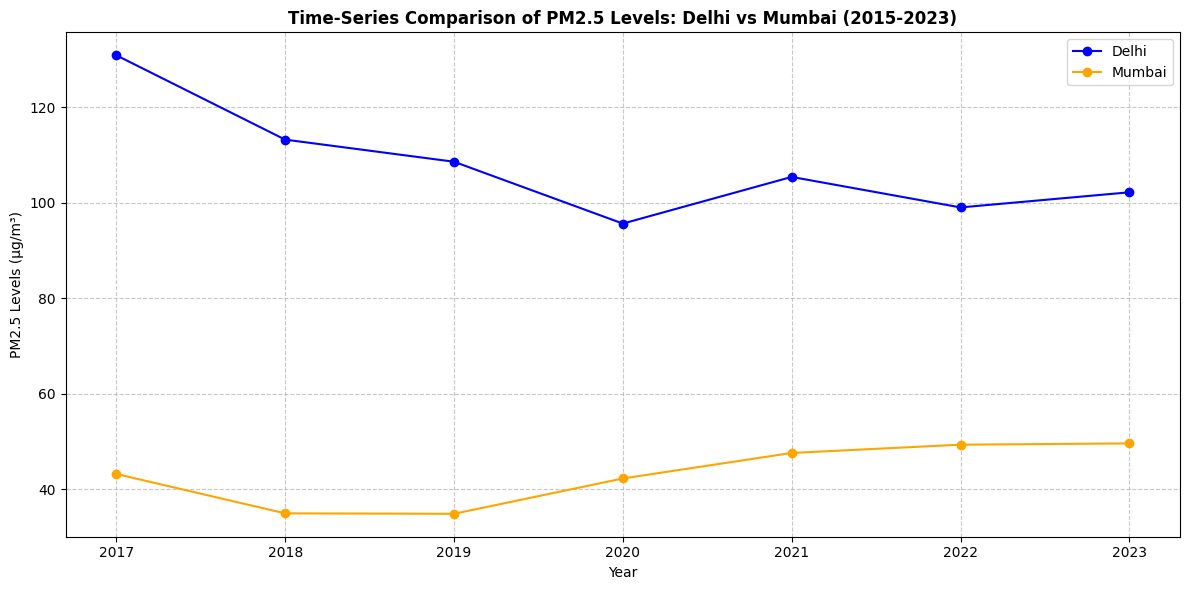

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['PM2.5_Delhi'], marker='o', label='Delhi', color='blue')
plt.plot(merged_data['Year'], merged_data['PM2.5_Mumbai'], marker='o', label='Mumbai', color='orange')
plt.title("Time-Series Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)", weight='bold')
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels (µg/m³)")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

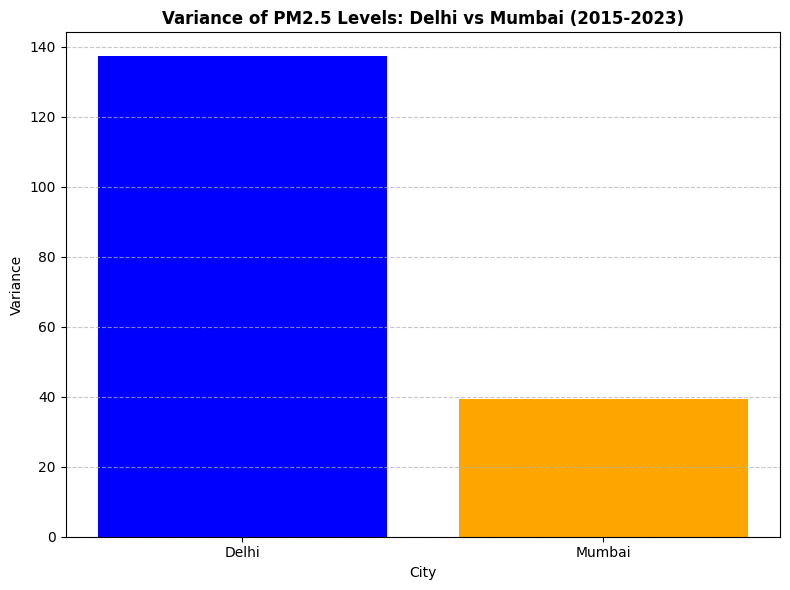

Delhi Variance: 137.29778905600128
Mumbai Variance: 39.326026129034204


In [24]:
delhi_variance = merged_data['PM2.5_Delhi'].var()
mumbai_variance = merged_data['PM2.5_Mumbai'].var()


variance_data = pd.DataFrame({
    'City': ['Delhi', 'Mumbai'],
    'Variance': [delhi_variance, mumbai_variance]
})

plt.figure(figsize=(8, 6))
plt.bar(variance_data['City'], variance_data['Variance'], color=['blue', 'orange'])
plt.title("Variance of PM2.5 Levels: Delhi vs Mumbai (2015-2023)", weight='bold')
plt.ylabel("Variance")
plt.xlabel("City")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Delhi Variance: {delhi_variance}")
print(f"Mumbai Variance: {mumbai_variance}")

## Population-Based

### 1. Which state in India has the highest number of monitoring stations relative to its population?

In [25]:
stations_per_state = (
     data[['state', 'station']]
    .drop_duplicates()
    .groupby('state', as_index=False)
    .count()
    .rename(columns={'station': 'Num_Stations', 'state':'State'})
)
stations_per_state

,State,Num_Stations
0,Andhra Pradesh,13
1,Arunachal Pradesh,1
2,Assam,9
3,Bihar,36
4,Chandigarh,3
5,Chhattisgarh,14
6,Delhi,40
7,Gujarat,17
8,Haryana,30
9,Himachal Pradesh,1


In [26]:
merged_df = pd.merge(state_data, stations_per_state, on='State', how='inner')
merged_df['Population_per_Station'] = merged_df['Population'] / merged_df['Num_Stations']

merged_df

,State,Population,Area (km2),Num_Stations,Population_per_Station
0,Uttar Pradesh,199812341,240928,57,3.505480e+06
1,Maharashtra,112374333,307713,97,1.158498e+06
2,Bihar,104099452,94163,36,2.891651e+06
3,West Bengal,91276115,88752,22,4.148914e+06
4,Madhya Pradesh,72626809,308252,29,2.504373e+06
5,Tamil Nadu,72147030,130058,36,2.004084e+06
6,Rajasthan,68548437,342239,46,1.490183e+06
7,Karnataka,61095297,191791,42,1.454650e+06
8,Gujarat,60439692,196024,17,3.555276e+06
9,Andhra Pradesh,49577103,162975,13,3.813623e+06


In [27]:
result = merged_df.sort_values(by='Population_per_Station', ascending=True)
print(result.iloc[0,0])

Chandigarh


### 2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


In [28]:
data_2023 = data[data['Timestamp'].dt.year == 2023]
data_2023 = data_2023.dropna(subset = ['PM2.5'])

total_pm25_per_state = (
    data_2023.groupby('state')['PM2.5']
    .sum()
    .reset_index()
    .rename(columns={'PM2.5':'Total_PM2.5', 'state':'State'}))

total_pm25_per_state

,State,Total_PM2.5
0,Andhra Pradesh,1.212228e+05
1,Arunachal Pradesh,6.196093e+03
2,Assam,1.849641e+05
3,Bihar,9.255538e+05
4,Chandigarh,6.369187e+04
5,Chhattisgarh,1.366105e+05
6,Delhi,1.384286e+06
7,Gujarat,2.764386e+05
8,Haryana,7.170170e+05
9,Himachal Pradesh,2.142189e+04


In [29]:
merged_df = pd.merge(total_pm25_per_state, state_data[['State', 'Population']], on='State', how='inner')
merged_df['Per_Capita_PM2.5'] = merged_df['Total_PM2.5'] / merged_df['Population']

top_5 = merged_df.sort_values('Per_Capita_PM2.5', ascending=False).head(5)

top_5

,State,Total_PM2.5,Population,Per_Capita_PM2.5
6,Delhi,1.384286e+06,16787941,0.082457
4,Chandigarh,6.369187e+04,1055450,0.060346
8,Haryana,7.170170e+05,25351462,0.028283
23,Rajasthan,6.765094e+05,68548437,0.009869
27,Tripura,3.419970e+04,3673917,0.009309


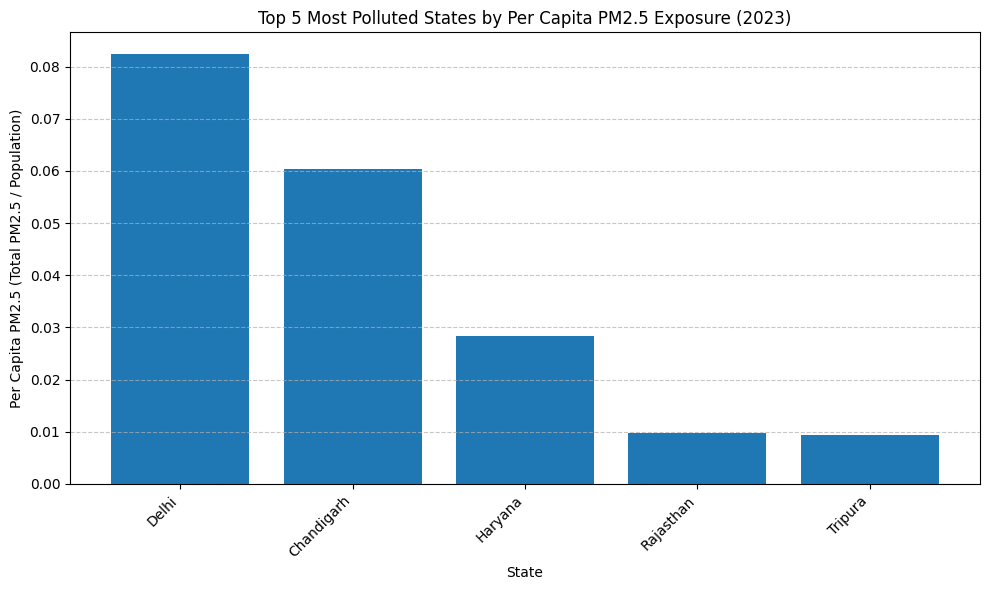

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(top_5['State'], top_5['Per_Capita_PM2.5'])
plt.title('Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 (Total PM2.5 / Population)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


In [31]:
state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']

avg_pm25_per_state = data.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25_per_state.rename(columns={'PM2.5': 'Average_PM2.5', 'state': 'State'}, inplace=True)

merged_density_df = pd.merge(avg_pm25_per_state, state_data[['State', 'Population Density']], on='State', how='inner')
merged_density_df

,State,Average_PM2.5,Population Density
0,Andhra Pradesh,35.049347,304.200663
1,Arunachal Pradesh,22.674513,16.523495
2,Assam,57.962372,397.837477
3,Bihar,76.918759,1105.523953
4,Chandigarh,56.666803,9258.333333
5,Chhattisgarh,28.761571,188.954953
6,Delhi,104.100918,11312.628706
7,Gujarat,52.462657,308.328021
8,Haryana,72.371070,573.406813
9,Himachal Pradesh,62.516878,123.302175


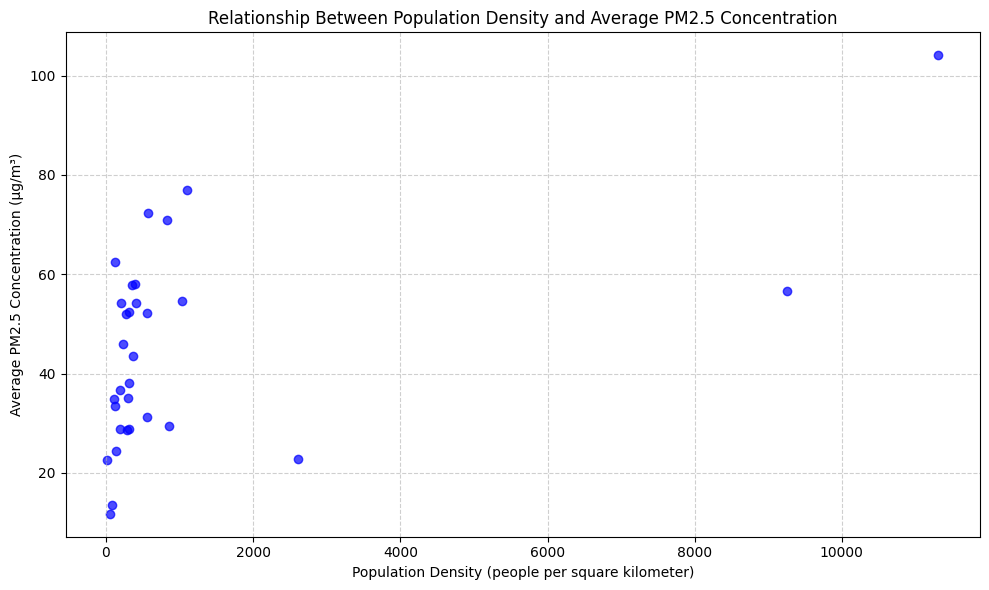

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_density_df['Population Density'], merged_density_df['Average_PM2.5'], color='blue', alpha=0.7)
plt.title('Relationship Between Population Density and Average PM2.5 Concentration')
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Area-Based

### 1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


In [33]:
pm25_per_km2 = (data.groupby('state')['PM2.5'].mean()
               / state_data.set_index('State')['Area (km2)'])
print(pm25_per_km2.idxmax())

Chandigarh


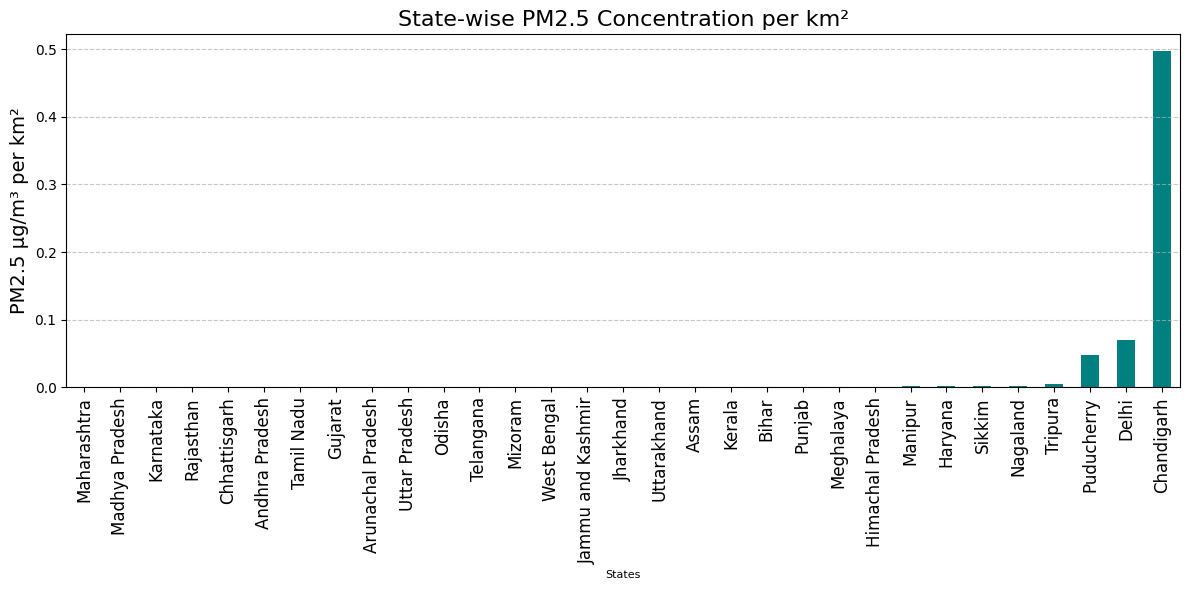

In [34]:
plt.figure(figsize=(12, 6))
pm25_per_km2.sort_values().plot(kind='bar', color='teal')
plt.title('State-wise PM2.5 Concentration per km²', fontsize=16)
plt.ylabel('PM2.5 μg/m³ per km²', fontsize=14)
plt.xlabel('States', fontsize=8)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

In [39]:
no_of_monitoring_stations = data.groupby('state')['station'].count()
area = state_data.set_index('State')['Area (km2)']

monitoring_stations_per_km2 = no_of_monitoring_stations / area
print(monitoring_stations_per_km2.idxmax())

Delhi


### 3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [40]:
data_2021 = data[data['Timestamp'].dt.year == 2021]


state_avg = data_2021.groupby('state')['PM2.5'].mean()
mp_pm25 = state_avg.get('Madhya Pradesh', np.nan)
mh_pm25 = state_avg.get('Maharashtra', np.nan)
print(f'PM2.5 values of Madhya Pradesh and Maharashtra:{mp_pm25} and {mh_pm25}')


state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']
mp_density = state_data[state_data['State'] == 'Madhya Pradesh']['Population Density'].iloc[0]
mh_density = state_data[state_data['State'] == 'Maharashtra']['Population Density'].iloc[0]
print(f'Population density of Madhya Pradesh and Maharashtra:{mp_density} and {mh_density}')

print("Therefore, it is evident that even Maharashtra has higher population but still Madhya Pradesh is more polluted by as it has higher average PM2.5 values for a lesser population density")




PM2.5 values of Madhya Pradesh and Maharashtra:47.095951831498965 and 46.44004417107664
Population density of Madhya Pradesh and Maharashtra:235.60855728429985 and 365.1920230864474
Therefore, it is evident that even Maharashtra has higher population but still Madhya Pradesh is more polluted by as it has higher average PM2.5 values for a lesser population density


## Funding Based

### 1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [41]:
ncap_funding_grouped = ncap_funding.groupby("State", as_index=False).agg({"Amount released during FY 2021-22": "sum"})
ncap_funding_grouped["Received NCAP funding during FY 2021-22"] = ncap_funding_grouped["Amount released during FY 2021-22"] > 0
ncap_funding_grouped

,State,Amount released during FY 2021-22,Received NCAP funding during FY 2021-22
0,Andhra Pradesh,11.48,True
1,Assam,0.00,False
2,Bihar,4.40,True
3,Chandigarh,4.61,True
4,Chhattisgarh,0.00,False
5,Delhi,11.25,True
6,Gujarat,0.00,False
7,Himachal Pradesh,0.48,True
8,Jammu & Kashmir,12.84,True
9,Jharkhand,0.00,False


In [42]:
states_ncap_2021_22 = ncap_funding_grouped[ncap_funding_grouped["Received NCAP funding during FY 2021-22"]]["State"].values
states_ncap_2021_22

array(['Andhra Pradesh', 'Bihar', 'Chandigarh', 'Delhi',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Nagaland', 'Odisha', 'Telangana',
       'Uttar Pradesh', 'Uttarakhand'], dtype=object)

In [43]:
data_2021

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Year,Month,Season
819621,2021-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,2021,1,Winter
819622,2021-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,2021,1,Winter
819623,2021-01-01,"Adarsh Nagar, Jaipur - RSPCB",75.795843,98.294719,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,2021,1,Winter
819624,2021-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,2021,1,Winter
819625,2021-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
1024381,2021-12-31,"Worli, Mumbai - MPCB",89.448000,159.470000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,2021,12,Winter
1024382,2021-12-31,"Yamunapuram, Bulandshahr - UPPCB",150.147368,250.074468,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,2021,12,Winter
1024383,2021-12-31,"Yerramukkapalli, Kadapa - APPCB",NaN,NaN,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,2021,12,Winter
1024384,2021-12-31,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,2021,12,Winter


In [44]:
# States that received the fundings
data_2021_22_ncap = data_2021[data_2021["state"].isin(states_ncap_2021_22)]
data_2021_22_ncap_grouped = data_2021_22_ncap.groupby("state", as_index=False).agg({"PM2.5": "mean"})
data_2021_22_ncap_grouped


,state,PM2.5
0,Andhra Pradesh,33.316491
1,Bihar,81.967836
2,Chandigarh,44.360885
3,Delhi,105.401629
4,Himachal Pradesh,NaN
5,Karnataka,26.745015
6,Madhya Pradesh,47.095952
7,Maharashtra,46.440044
8,Nagaland,33.437906
9,Odisha,37.812390


In [45]:
data_2021_22_ncap_grouped.describe()

,PM2.5
count,11.000000
mean,52.620111
std,25.456572
min,26.745015
25%,35.625148
50%,44.360885
75%,64.531894
max,105.401629


In [46]:
data_2021_22_non_ncap = data_2021[~data_2021["state"].isin(states_ncap_2021_22)]
data_2021_22_non_ncap_grouped = data_2021_22_non_ncap.groupby("state", as_index=False).agg({"PM2.5": "mean"})
data_2021_22_non_ncap_grouped.describe()

,PM2.5
count,15.000000
mean,38.778228
std,20.413195
min,12.197489
25%,22.531136
50%,31.909474
75%,55.665999
max,75.320179


### 2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

In [47]:
data_assam = data[data["state"] == "Assam"]
assam_cities = ncap_funding[ncap_funding['State'] == 'Assam']['City'].unique()
assam_pm = data[
    (data['state'] == 'Assam') &
    data['city'].isin(assam_cities) &
    pd.notna(data['PM2.5'])
    ]
assam_pm_grouped = assam_pm.groupby(pd.Grouper(key='Timestamp', freq='M')).agg({"PM2.5": "mean"})
assam_pm_grouped

,PM2.5
Timestamp,
2019-02-28,82.306780
2019-03-31,97.548091
2019-04-30,49.911230
2019-05-31,57.818598
2019-06-30,28.756014
...,...
2024-08-31,28.371500
2024-09-30,33.463198
2024-10-31,31.454550


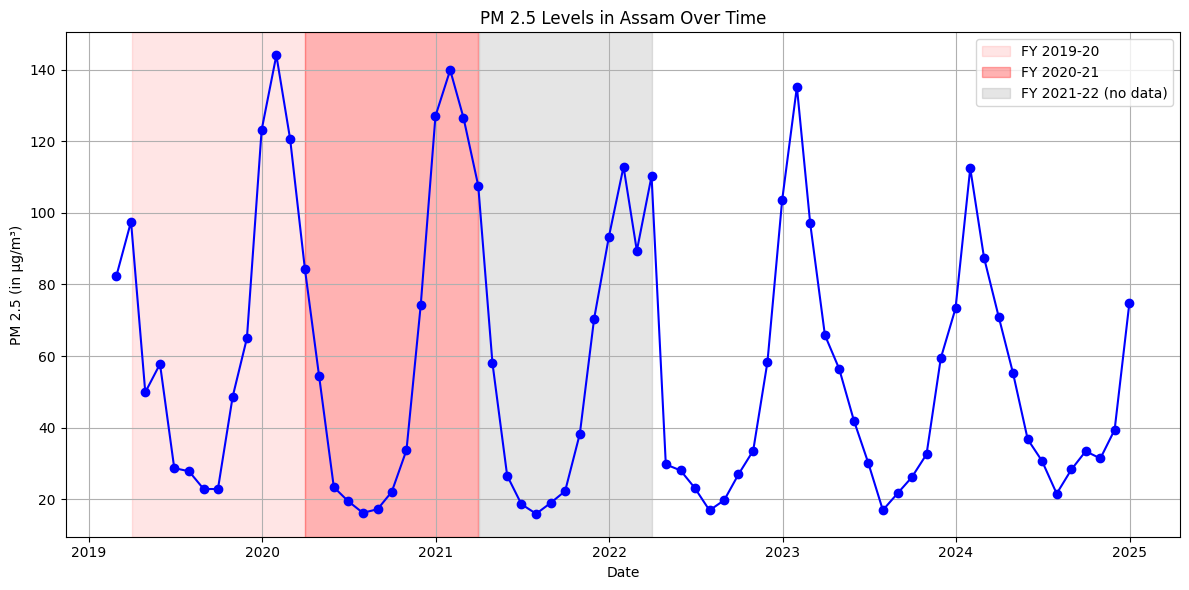

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(assam_pm_grouped["PM2.5"], color='blue', linestyle='-', marker='o')

# Adding shaded regions to differentiate financial years
plt.axvspan(pd.Timestamp('2019-04-01'), pd.Timestamp('2020-03-31'), color='red', alpha=0.1, label='FY 2019-20')
plt.axvspan(pd.Timestamp('2020-04-01'), pd.Timestamp('2021-03-31'), color='red', alpha=0.3, label='FY 2020-21')
plt.axvspan(pd.Timestamp('2021-04-01'), pd.Timestamp('2022-03-31'), color='black', alpha=0.1, label='FY 2021-22 (no data)')

plt.title("PM 2.5 Levels in Assam Over Time")
plt.xlabel("Date")
plt.ylabel("PM 2.5 (in μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [49]:
assam_funding = ncap_funding[ncap_funding["State"] == "Assam"]
assam_funding.groupby("State").agg({"Amount released during FY 2019-20": "sum", "Amount released during FY 2020-21": "sum", "Amount released during FY 2021-22": "sum"})

,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22
State,,,
Assam,0.36,12.0,0.0


During FY 2019-20, Assam received ₹0.36 Cr in NCAP fundings. However, in the next financial year, the amount released was ₹12 Cr, which was a significant leap. There's no data for any fundings received by Assam for the FY 2021-22 and onwards.

In [50]:
fy_2019_20 = assam_pm[(assam_pm['Timestamp'] >= '2019-04-01') & (assam_pm['Timestamp'] <= '2020-03-31')]
fy_2020_21 = assam_pm[(assam_pm['Timestamp'] >= '2020-04-01') & (assam_pm['Timestamp'] <= '2021-03-31')]
fy_2021_22 = assam_pm[(assam_pm['Timestamp'] >= '2021-04-01') & (assam_pm['Timestamp'] <= '2022-03-31')]

fy_2019_20_desc = fy_2019_20['PM2.5'].describe()
fy_2020_21_desc = fy_2020_21['PM2.5'].describe()
fy_2021_22_desc = fy_2021_22['PM2.5'].describe()

stat_summary = pd.DataFrame({'FY 2019-20': fy_2019_20_desc, 'FY 2020-21': fy_2020_21_desc, 'FY 2021-22': fy_2021_22_desc})
stat_summary

,FY 2019-20,FY 2020-21,FY 2021-22
count,365.000000,443.000000,710.000000
mean,66.095790,75.200235,56.865279
std,67.058464,56.853823,41.470159
min,6.026234,1.877647,6.245474
25%,24.695106,21.554788,20.283306
50%,45.635895,65.146000,45.977926
75%,95.315158,122.476643,88.021542
max,916.670000,272.423830,192.649468


Clearly, the increase in NCAP fundings—from ₹0.36 Cr in FY 2019–20 to ₹12 Cr in FY 2020–21—does not manifest a straightforward correlation with improved PM2.5 metrics. Although average PM2.5 concentrations slightly rose in FY 2020–21, the maximum readings declined, suggesting a possible reduction in extreme pollution scenarios. So overall, the current evidence does NOT conclusively indicate that increased financial funding alone led to a definitive improvement in air quality.

### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

In [51]:
ncap_state_total = ncap_funding.groupby("State", as_index=False).agg({"Total fund released": "sum"})
ncap_state_total

,State,Total fund released
0,Andhra Pradesh,35.12
1,Assam,12.36
2,Bihar,21.60
3,Chandigarh,17.89
4,Chhattisgarh,13.06
5,Delhi,11.25
6,Gujarat,12.00
7,Himachal Pradesh,10.72
8,Jammu & Kashmir,20.96
9,Jharkhand,6.00


In [52]:
state_data[state_data["State"].isin(ncap_state_total["State"])]

,State,Population,Area (km2),Population Density
0,Uttar Pradesh,199812341,240928,829.344622
1,Maharashtra,112374333,307713,365.192023
2,Bihar,104099452,94163,1105.523953
3,West Bengal,91276115,88752,1028.440091
4,Madhya Pradesh,72626809,308252,235.608557
5,Tamil Nadu,72147030,130058,554.729659
6,Rajasthan,68548437,342239,200.294055
7,Karnataka,61095297,191791,318.551428
8,Gujarat,60439692,196024,308.328021
9,Andhra Pradesh,49577103,162975,304.200663


There is a slight discrepancy in the datasets. NCAP_Funding.csv lists down J&K as "Jammu & Kashmir", whereas State_data.csv lists it down as "Jammu and Kashmir", leading to it not turning up in state_data[state_data["State"].isin(ncap_state_total["State"])].

To handle this, we simply modify one of the datasets in the following manner.

In [53]:

def normalize_state_names(state_name):
    return state_name.replace("Jammu & Kashmir", "Jammu and Kashmir")

ncap_state_total["State"] = ncap_state_total["State"].apply(normalize_state_names)
state_data["State"] = state_data["State"].apply(normalize_state_names)

state_data[state_data["State"].isin(ncap_state_total["State"])]

,State,Population,Area (km2),Population Density
0,Uttar Pradesh,199812341,240928,829.344622
1,Maharashtra,112374333,307713,365.192023
2,Bihar,104099452,94163,1105.523953
3,West Bengal,91276115,88752,1028.440091
4,Madhya Pradesh,72626809,308252,235.608557
5,Tamil Nadu,72147030,130058,554.729659
6,Rajasthan,68548437,342239,200.294055
7,Karnataka,61095297,191791,318.551428
8,Gujarat,60439692,196024,308.328021
9,Andhra Pradesh,49577103,162975,304.200663


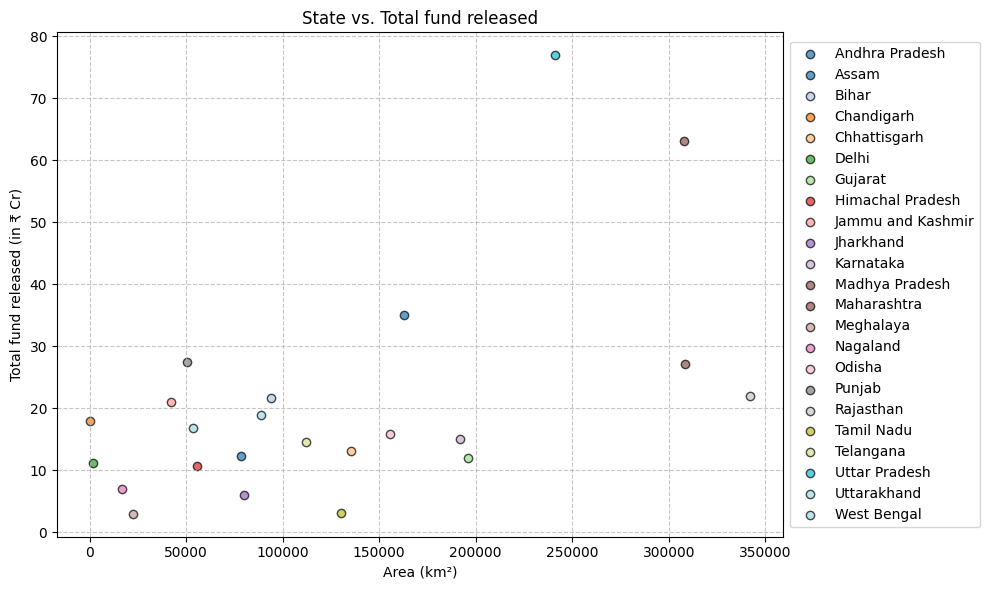

In [54]:
plt.figure(figsize=(10, 6))

unique_states = ncap_state_total["State"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(ncap_state_total)))

for color, state in zip(colors, unique_states):
    area = state_data[state_data["State"] == state]["Area (km2)"].values[0]
    funding = ncap_state_total[ncap_state_total["State"] == state]["Total fund released"].values[0]
    plt.scatter(area, funding, color=color, label=state, alpha=0.7, edgecolor='black')

plt.xlabel("Area (km²)")
plt.ylabel("Total fund released (in ₹ Cr)")
plt.title("State vs. Total fund released")

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)
plt.tight_layout()
plt.show()

## Miscellaneous Questions

### 1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]

- Finding the city with highest average pollution in 2023:

In [55]:
data_2023 = data[data['Timestamp'].dt.year == 2023]

city_avg_pollution = data_2023.groupby('city', as_index=False).agg({'PM2.5': 'mean'})
city_avg_pollution

,city,PM2.5
0,Agartala,80.469872
1,Agra,33.653939
2,Ahmedabad,51.058395
3,Ahmednagar,34.212563
4,Aizawl,10.010255
...,...,...
274,Virudhunagar,NaN
275,Visakhapatnam,53.142255
276,Vrindavan,34.491679
277,Yadgir,31.620583


In [56]:
city_avg_pollution.sort_values(by='PM2.5', ascending=False).head(1)

,city,PM2.5
77,Darbhanga,242.917032


So, the city in question is Darbhanga, Bihar. Let us look at the day-wise PM 2.5 data of Darbhanga in 2023.

In [57]:
darbhanga_data = data_2023[data_2023['city'] == 'Darbhanga']
darbhanga_data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Year,Month,Season
1229674,2023-01-01,"Town Hall - Lal Bagh, Darbhanga - BSPCB",411.135417,620.000000,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,1,Winter
1230235,2023-01-02,"Town Hall - Lal Bagh, Darbhanga - BSPCB",192.554348,338.967033,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,1,Winter
1230796,2023-01-03,"Town Hall - Lal Bagh, Darbhanga - BSPCB",126.609195,226.770115,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,1,Winter
1231357,2023-01-04,"Town Hall - Lal Bagh, Darbhanga - BSPCB",159.447917,276.284211,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,1,Winter
1231918,2023-01-05,"Town Hall - Lal Bagh, Darbhanga - BSPCB",172.454545,306.744186,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
1431634,2023-12-27,"Town Hall - Lal Bagh, Darbhanga - BSPCB",NaN,NaN,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,12,Winter
1432195,2023-12-28,"Town Hall - Lal Bagh, Darbhanga - BSPCB",NaN,NaN,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,12,Winter
1432756,2023-12-29,"Town Hall - Lal Bagh, Darbhanga - BSPCB",NaN,NaN,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,12,Winter
1433317,2023-12-30,"Town Hall - Lal Bagh, Darbhanga - BSPCB",NaN,NaN,"CAAQMS, installed at Town Hall, Lal Bagh, Darb...",Darbhanga,26.15146,85.89342,Bihar,2023,12,Winter


- Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³):

In [58]:
answer = darbhanga_data[darbhanga_data['PM2.5'] > 300].shape[0] / darbhanga_data.shape[0] * 100
print(f"Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): {answer:.2f}%")

Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): 0.82%


### 2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]

In [59]:
year_mask = (data['Timestamp'].dt.year >= 2018) & (data['Timestamp'].dt.year <= 2020)
delhi_data = data[data['state'] == 'Delhi'][year_mask]
delhi_data['day_of_year'] = delhi_data['Timestamp'].dt.dayofyear

delhi_data

/tmp/ipykernel_2238/1513602244.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delhi_data = data[data['state'] == 'Delhi'][year_mask]


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Year,Month,Season,day_of_year
204772,2018-01-01,"Alipur, Delhi - DPCC",NaN,NaN,Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi,2018,1,Winter,1
204775,2018-01-01,"Anand Vihar, Delhi - DPCC",481.625000,572.450000,NaN,Delhi,28.647622,77.315809,Delhi,2018,1,Winter,1
204783,2018-01-01,"Ashok Vihar, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.695381,77.181665,Delhi,2018,1,Winter,1
204785,2018-01-01,"Aya Nagar, Delhi - IMD",254.213165,424.537975,NaN,Delhi,28.470691,77.109936,Delhi,2018,1,Winter,1
204800,2018-01-01,"Bawana, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.776200,77.051074,Delhi,2018,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819557,2020-12-31,"Sirifort, Delhi - CPCB",211.208791,317.729412,NaN,Delhi,28.550425,77.215938,Delhi,2020,12,Winter,366
819562,2020-12-31,"Sonia Vihar, Delhi - DPCC",285.536842,404.778947,NaN,Delhi,28.710508,77.249485,Delhi,2020,12,Winter,366
819563,2020-12-31,"Sri Aurobindo Marg, Delhi - DPCC",218.989583,252.604167,NaN,Delhi,28.531346,77.190156,Delhi,2020,12,Winter,366
819612,2020-12-31,"Vivek Vihar, Delhi - DPCC",305.042105,416.895833,"Vivek Vihar, 110095",Delhi,28.672342,77.315260,Delhi,2020,12,Winter,366


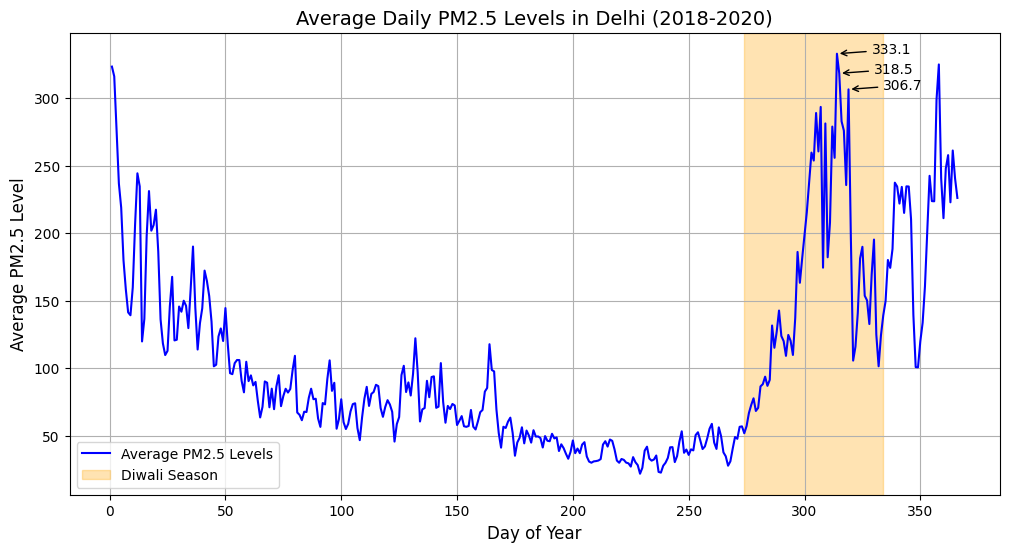

In [60]:
avg_pm25_per_day = delhi_data.groupby('day_of_year')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_pm25_per_day.index, avg_pm25_per_day.values, label='Average PM2.5 Levels', color='blue')

plt.axvspan(274, 334, color='orange', alpha=0.3, label='Diwali Season')


diwali_spikes = avg_pm25_per_day.loc[274:334].nlargest(3)  
for day, value in diwali_spikes.items():
    plt.annotate(f'{value:.1f}', 
                 xy=(day, value), 
                 xytext=(day + 15, value),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 fontsize=10)

plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Average PM2.5 Level', fontsize=12)
plt.title('Average Daily PM2.5 Levels in Delhi (2018-2020)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### 3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]

In [61]:
ncap_funding_state = ncap_funding.groupby('State', as_index=False).agg({'Amount released during FY 2020-21': 'sum'})
ncap_funding_state.sort_values(by='Amount released during FY 2020-21', ascending=False).head(5)

,State,Amount released during FY 2020-21
0,Andhra Pradesh,17.28
16,Punjab,15.04
22,West Bengal,13.00
20,Uttar Pradesh,12.16
1,Assam,12.00


Andhra Pradesh received the highest NCAP funding in 2020 (₹17.28 Cr).

In [62]:
andhra_pm = data[data['state'] == 'Andhra Pradesh']
andhra_pm

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Year,Month,Season
9,2017-01-01,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NaN,NaN,"Sri Venkateswara Anam Kala Kendram, Lakshmivar...",Rajamahendravaram,16.987287,81.736318,Andhra Pradesh,2017,1,Winter
130,2017-01-01,"GVM Corporation, Visakhapatnam - APPCB",NaN,NaN,"GVMC Building, Jail Rd, Ram Nagar",Visakhapatnam,17.720000,83.300000,Andhra Pradesh,2017,1,Winter
135,2017-01-01,"Gangineni Cheruvu, Chittoor - APPCB",NaN,NaN,"Andhra Pradesh State Pollution Control Board, ...",Chittoor,13.204880,79.097889,Andhra Pradesh,2017,1,Winter
150,2017-01-01,"Gulzarpet, Anantapur - APPCB",NaN,NaN,"Public Health Office, Court Road, Anantapur.",Anantapur,14.675886,77.593027,Andhra Pradesh,2017,1,Winter
155,2017-01-01,"HB Colony, Vijayawada - APPCB",NaN,NaN,"Near Water Tank, Water Tank Road, HB Colony, B...",Vijayawada,16.536107,80.594233,Andhra Pradesh,2017,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
1627298,2024-12-10,"Rajiv Nagar, Vijayawada - APPCB",36.27,67.61,"Water Tank, Near Government Hospital, Rajiv Na...",Vijayawada,16.554731,80.649110,Andhra Pradesh,2024,12,Winter
1627344,2024-12-10,"Secretariat, Amaravati - APPCB",56.76,93.16,"CAAQM Station, Security Building Terrace, Gate...",Amaravati,16.515083,80.518167,Andhra Pradesh,2024,12,Winter
1627421,2024-12-10,"Tirumala, Tirupati - APPCB",63.89,82.65,"Near GNC Toll Gate, Tirumala-Tirupati Rd Tirum...",Tirupati,13.670000,79.350000,Andhra Pradesh,2024,12,Winter
1627435,2024-12-10,"Vaikuntapuram, Tirupati - APPCB",69.66,107.20,"Andhra Pradesh State Pollution Control Board, ...",Tirupati,13.615387,79.409230,Andhra Pradesh,2024,12,Winter


In [63]:
andhra_pm['year'] = andhra_pm['Timestamp'].dt.year
andhra_pm_yearly = andhra_pm.groupby('year', as_index=False).agg({'PM2.5':'mean'})
andhra_pm_yearly

/tmp/ipykernel_2238/1423463040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andhra_pm['year'] = andhra_pm['Timestamp'].dt.year


,year,PM2.5
0,2017,46.966870
1,2018,38.158007
2,2019,33.899712
3,2020,30.425130
4,2021,33.316491
5,2022,34.334527
6,2023,36.294259
7,2024,33.274945


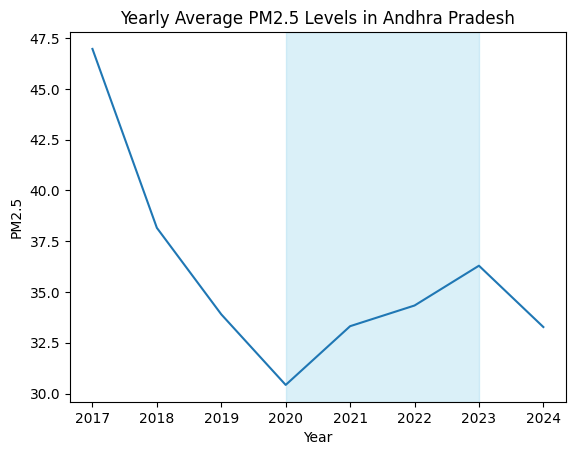

In [64]:
plt.plot(andhra_pm_yearly['year'], andhra_pm_yearly['PM2.5'])
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.axvspan(2020, 2023, color='skyblue', alpha=0.3)
plt.title('Yearly Average PM2.5 Levels in Andhra Pradesh')
plt.show()

Even though Andhra Pradesh received the most NCAP fundings in the year 2020, the PM 2.5 values in the state from 2020 to 2023 rise.

### 4. Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

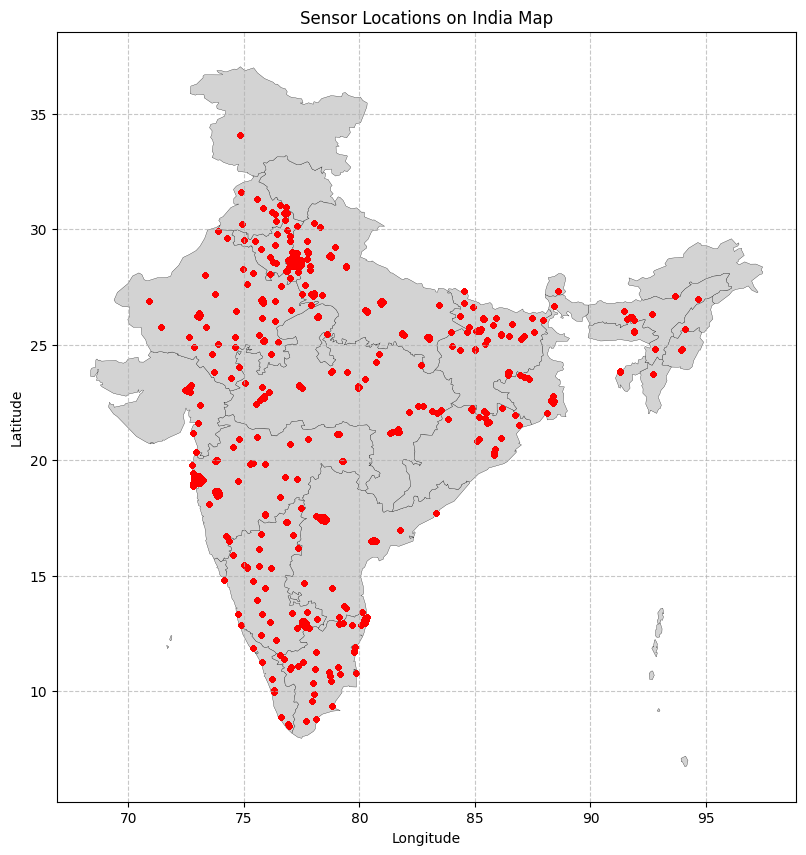

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

india = gpd.read_file('India Shape/india_st.shp')

fig, ax = plt.subplots(figsize=(10, 10))

india.plot(ax=ax, color='lightgray', edgecolor='black', linewidth = 0.2)

ax.scatter(data['longitude'], data['latitude'], color='red', alpha=0.5, s = 10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Sensor Locations on India Map')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## An Interesting Observation

The dataset reveals significant gaps in sensor coverage in certain regions of India. A few regions have been marked with blue circles in the map shown below.

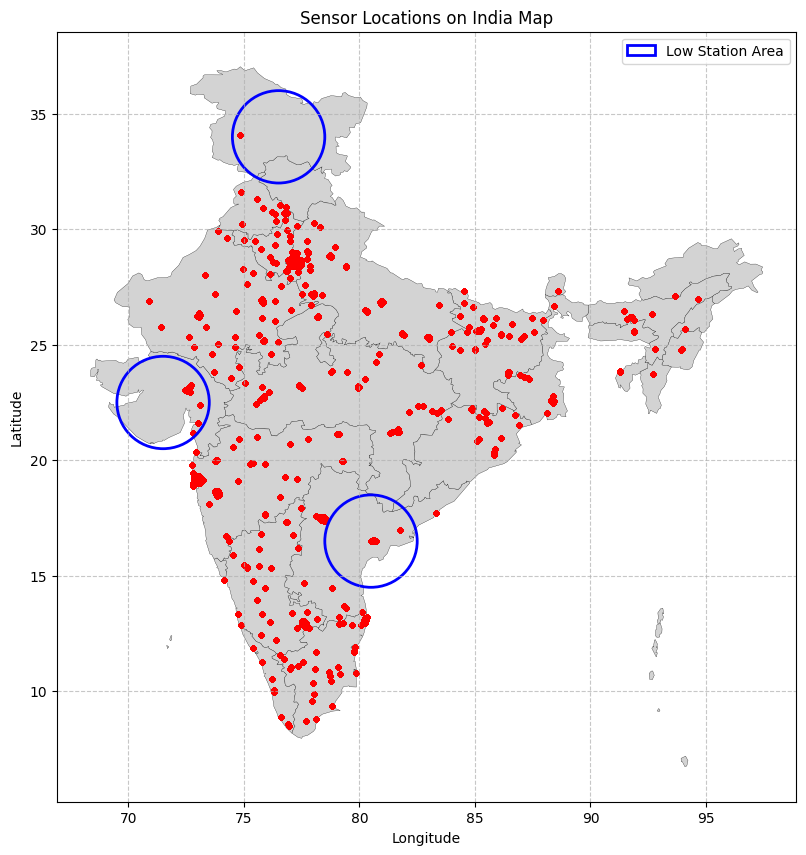

In [66]:
from matplotlib.patches import Circle

india = gpd.read_file('India Shape/india_st.shp')

fig, ax = plt.subplots(figsize=(10, 10))

india.plot(ax=ax, color='lightgray', edgecolor='black', linewidth = 0.2)

ax.scatter(data['longitude'], data['latitude'], color='red', alpha=0.5, s = 10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Sensor Locations on India Map')
plt.grid(True, linestyle='--', alpha=0.7)

circle_gujarat = Circle((71.5, 22.5), 2, color='blue', fill=False, linewidth=2, label='Low Station Area')
plt.gca().add_patch(circle_gujarat)

circle_andhra = Circle((80.5, 16.5), 2, color='blue', fill=False, linewidth=2)
plt.gca().add_patch(circle_andhra)

circle_jk = Circle((76.5, 34), 2, color='blue', fill=False, linewidth=2)
plt.gca().add_patch(circle_jk)

plt.legend()
plt.grid(True)
plt.show()

Policymakers should prioritize installing more stations in these areas to ensure comprehensive air quality monitoring. This would enable better pollution control measures, improve public health outcomes, and support data-driven environmental policies. Addressing these gaps will lead to more equitable and effective air quality management across the country.

Further Data-Analysis Opportunities:

Clustering (e.g. k-means) can be done on this dataset to identify clusters of air quality monitoring stations. Then, average PM2.5 levels, population, etc. can be looked into for these cluster coordinates, as a further attempt to analyse how much of a help these stations actually are.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35154620-e4ec-43da-9ac2-daab945ce844' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>